# Netflix Content Analysis
# 📌 1. Introduction

This project explores Netflix's catalog using exploratory data analysis (EDA) techniques.
We uncover trends in content type, genre, release year distribution, and viewer targeting.
# 📊 2. Load Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Netflix dataset
df = pd.read_excel('netflix1.xlsx')  # Adjust if file path changes

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 📋 3. Initial Exploration

In [9]:
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nData types and missing values info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

Shape of dataset: (8790, 12)

First 5 rows:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States 2021-09-25          2020  PG-13    90 min   
1         France 2021-09-24          2021  TV-MA  1 Season   
2  United States 2021-09-24          2021  TV-MA  1 Season   
3         Brazil 2021-09-22          2021  TV-PG    91 min   
4  United States 2021-09-24          1993  TV-MA   125 min   

                                           listed_in  year_added  month_added  
0                                      Documentaries        2021

# 🧹 4. Data Cleaning

In [10]:
# Check for duplicate rows
print("Duplicate rows before cleaning:", df.duplicated().sum())

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# Confirm no duplicates left
print("Duplicate rows after cleaning:", df.duplicated().sum())

# Check unique values in 'duration' to understand its format
print("\nSample unique durations:")
print(df['duration'].unique()[:10])  # See first 10 unique duration values

# Create new columns from 'date_added' for year, month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Confirm new columns added
df[['date_added', 'year_added', 'month_added']].head()

Duplicate rows before cleaning: 0
Duplicate rows after cleaning: 0

Sample unique durations:
['90 min' '1 Season' '91 min' '125 min' '9 Seasons' '104 min' '87 min'
 '127 min' '76 min' '71 min']


,date_added,year_added,month_added
0,2021-09-25,2021,9
1,2021-09-24,2021,9
2,2021-09-24,2021,9
3,2021-09-22,2021,9
4,2021-09-24,2021,9


# 🧠 5. EDA and Visualizations

## 5.1 Distribution of Content Type
(Movies vs TV Shows)
- Pie Chart
- Bar Chart

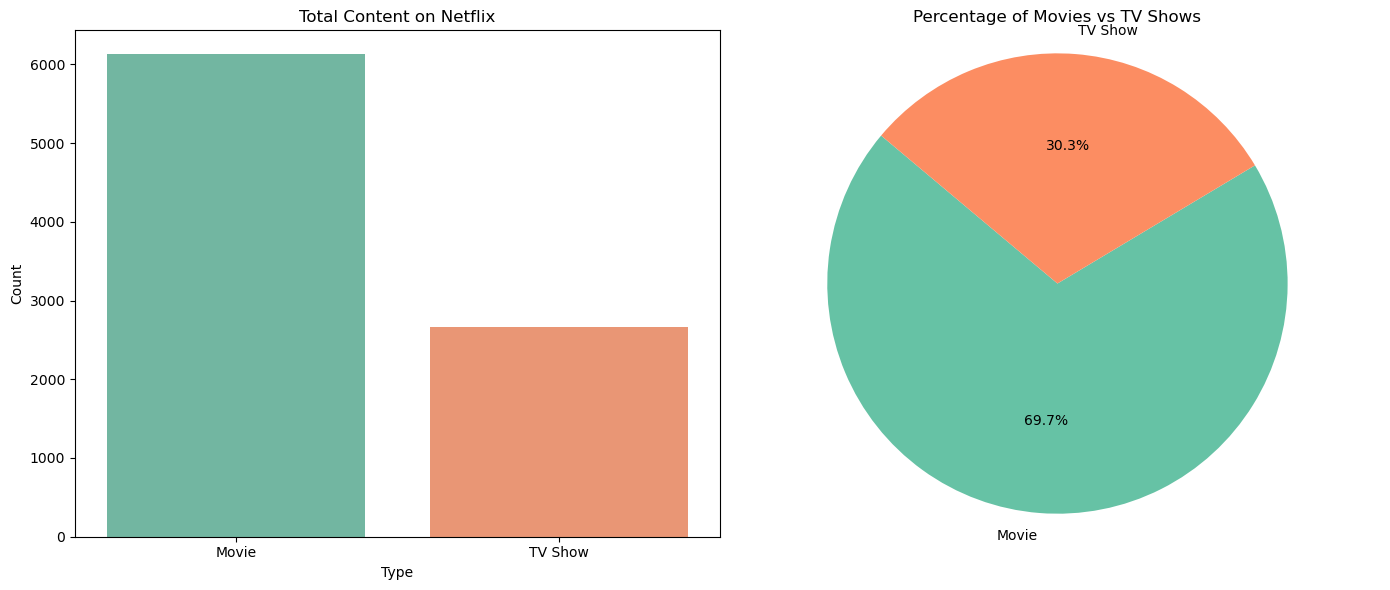

In [11]:
# Set up the figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
sns.countplot(data=df, x='type', palette='Set2', ax=ax1)
ax1.set_title('Total Content on Netflix')
ax1.set_xlabel('Type')
ax1.set_ylabel('Count')

# Pie chart
type_counts = df['type'].value_counts()
labels = type_counts.index
sizes = type_counts.values

ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
ax2.set_title('Percentage of Movies vs TV Shows')
ax2.axis('equal')  # Equal aspect ratio for circle

plt.tight_layout()
plt.show()

## 5.2 Content Added Over The Years
- Bar Chart showing number of titles added each year.

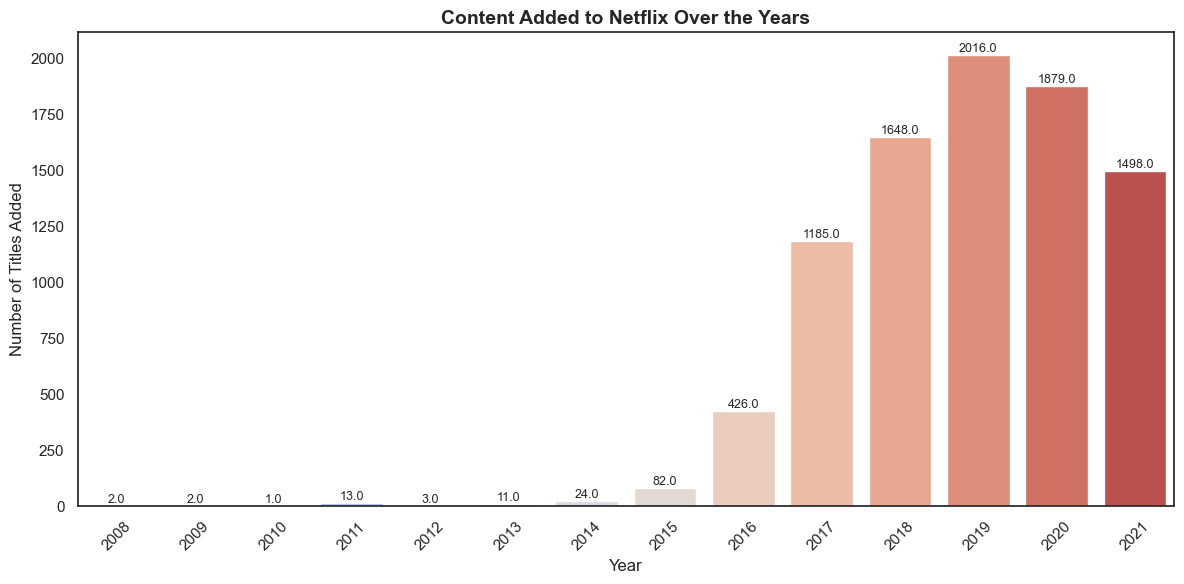

In [57]:
# Create a summary table: Titles added per year
titles_per_year = df['year_added'].value_counts().sort_index()


# Show table nicely below chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot (with grid removed and value labels added)
bars = sns.countplot(
    data=df,
    x='year_added',
    palette='coolwarm',
    order=sorted(df['year_added'].dropna().unique()),
    ax=ax
)

ax.set_title('Content Added to Netflix Over the Years', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Titles Added', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(False)  # Remove gridlines

# Add value labels
for p in bars.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 5.3 Content Added Over The Years
- Line PLot showing number of titles added each year.

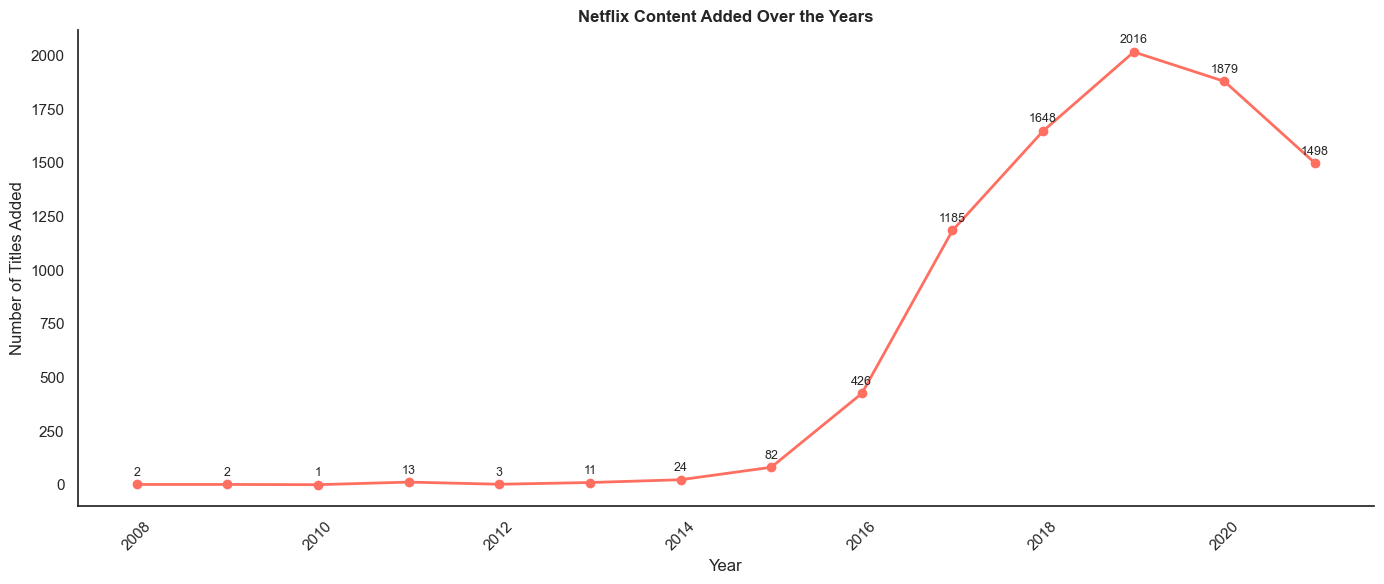

In [56]:
plt.figure(figsize=(14, 6))
sns.set_style("white")

# Plotting the line chart
plt.plot(titles_per_year_df['Year'], titles_per_year_df['Number of Titles Added'],
         marker='o', color='#ff6f61', linewidth=2)

# Add value labels on top of markers
for i in range(len(titles_per_year_df)):
    plt.text(titles_per_year_df['Year'][i],
             titles_per_year_df['Number of Titles Added'][i] + 40,
             str(titles_per_year_df['Number of Titles Added'][i]),
             ha='center', fontsize=9)

# Styling
plt.title('Netflix Content Added Over the Years', fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
sns.despine()

plt.tight_layout()
plt.show()

## 5.4 Distribution of Content by Release Year
- Histogram of content based on release years.

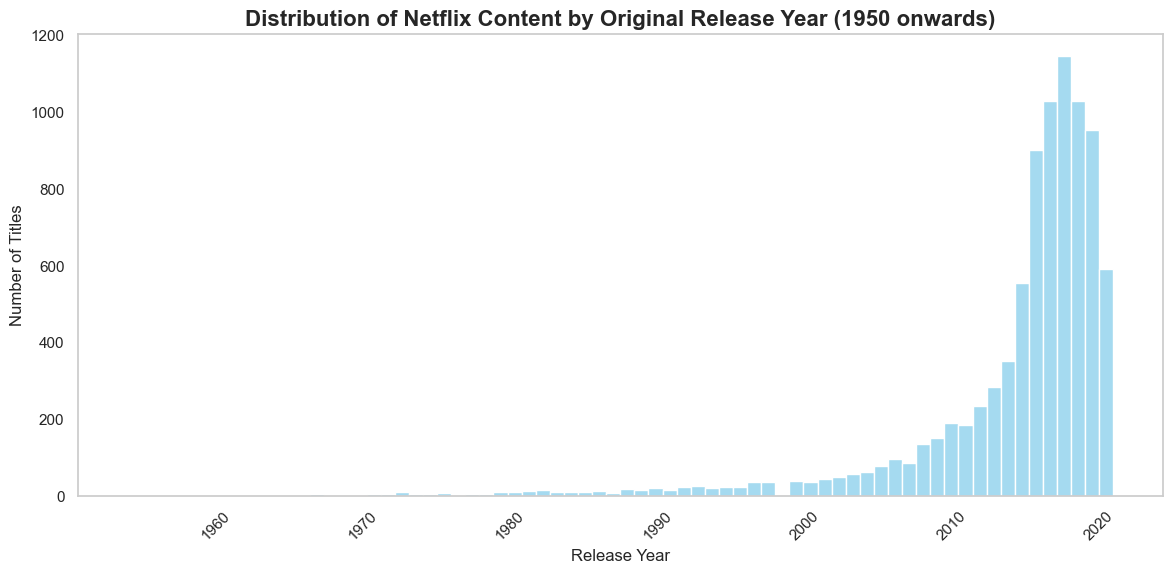

In [40]:
# Analyze the distribution of content by original Release Year

# Setting a minimum year (optional - to avoid very old releases like 1920s cluttering plot)
df_recent = df[df['release_year'] >= 1950]

plt.figure(figsize=(14, 6))
sns.histplot(data=df_recent, x='release_year', bins=70, kde=False, color='skyblue')

plt.title('Distribution of Netflix Content by Original Release Year (1950 onwards)', fontsize=16, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

## 5.5 Content Release by Year
- Bar Plot showing Rise/Fall of Released Titles

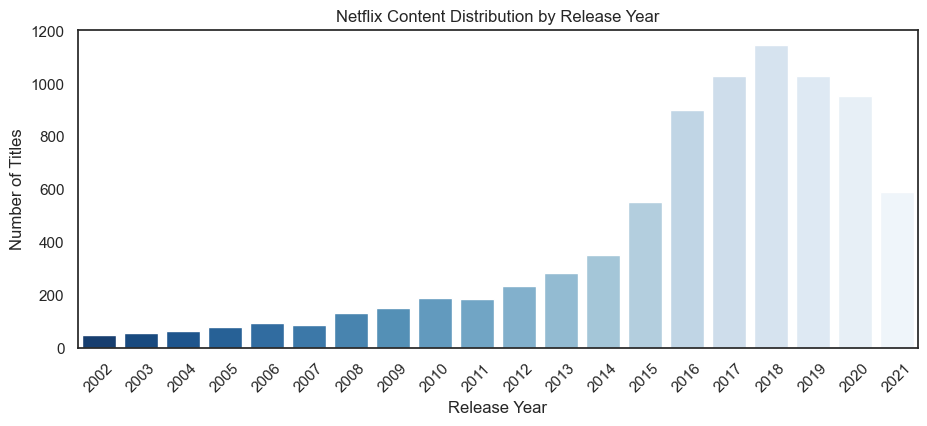

In [58]:
# Top 20 most common release years
top_release_years = df['release_year'].value_counts().sort_values(ascending=False).head(20)

# Plot as bar chart + table
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart for Top 20
sns.barplot(data=top_release_years_df, x='Release Year', y='Number of Titles', palette='Blues_r', ax=ax)

ax.set_title('Netflix Content Distribution by Release Year')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Titles')
plt.xticks(rotation=45)

plt.subplots_adjust(left=0.2, bottom=0.35)
plt.show()

# Create release year counts
release_year_counts = df['release_year'].value_counts().sort_index()

# Focus only on years where most content is concentrated (optional filter from 2000 onwards)
release_year_recent = release_year_counts[release_year_counts.index >= 2000]

## 5.6 Content Release by Year
- Line Plot showing Rise/Fall of Released Titles

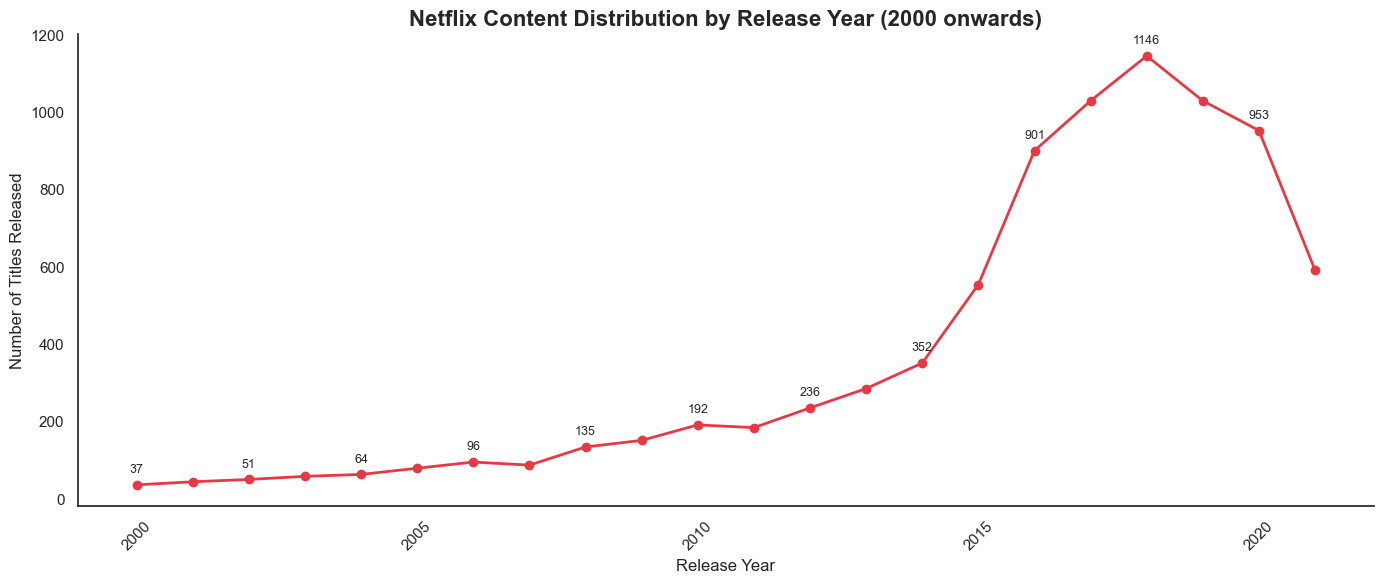

In [44]:
plt.figure(figsize=(14, 6))
sns.set_style("white")  # Clean background without gridlines

# Line plot
plt.plot(release_year_recent.index,
         release_year_recent.values,
         marker='o', linestyle='-', color='#e63946', linewidth=2)

# Add value labels on key years (optional: skip every few to reduce clutter)
for i in range(0, len(release_year_recent), 2):
    plt.text(release_year_recent.index[i],
             release_year_recent.values[i] + 30,
             str(release_year_recent.values[i]),
             ha='center', fontsize=9)

# Labels and styling
plt.title('Netflix Content Distribution by Release Year (2000 onwards)',
          fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Released', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
sns.despine()

plt.tight_layout()
plt.show()

## 5.7 Top 10 Countries Producing Content
- Horizontal Bar Plot of Top Countries

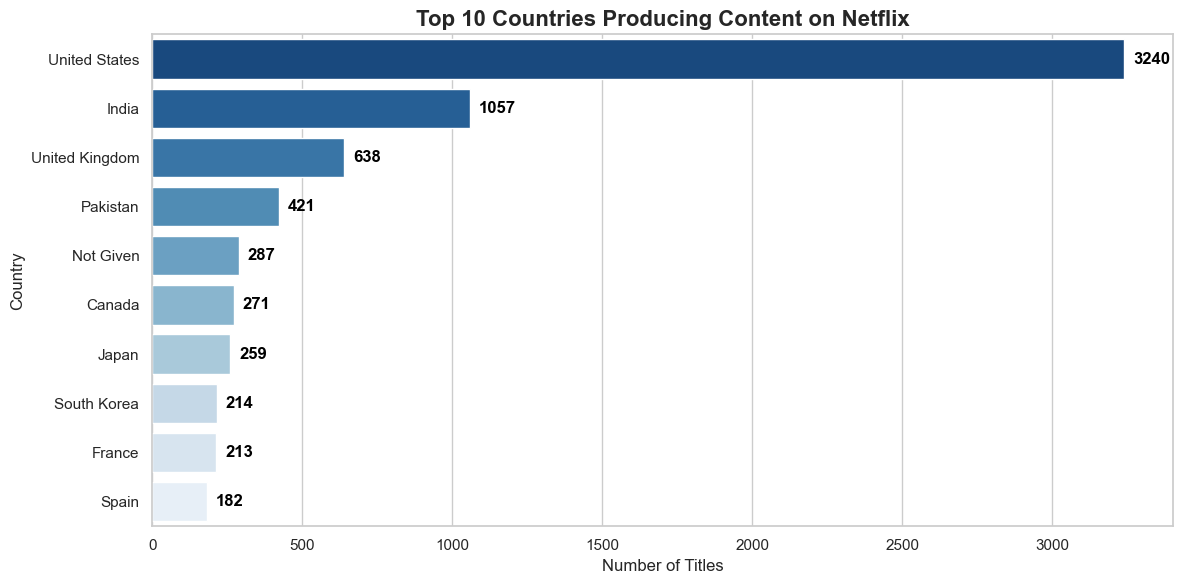

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort and prepare data
top_countries = df['main_country'].value_counts().head(10)

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

# Plot
ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')

# Add value labels
for i, v in enumerate(top_countries.values):
    ax.text(v + 30, i, str(v), color='black', va='center', fontweight='bold')

# Title and labels
plt.title("Top 10 Countries Producing Content on Netflix", fontsize=16, weight='bold')
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Remove y-axis gridlines for a cleaner look
ax.grid(axis='y', linestyle='', linewidth=0)

# Show plot
plt.tight_layout()
plt.show()

## 5.8 Top 5 Countries by Content Type
- Grouped bar plot.

<Figure size 1200x600 with 0 Axes>

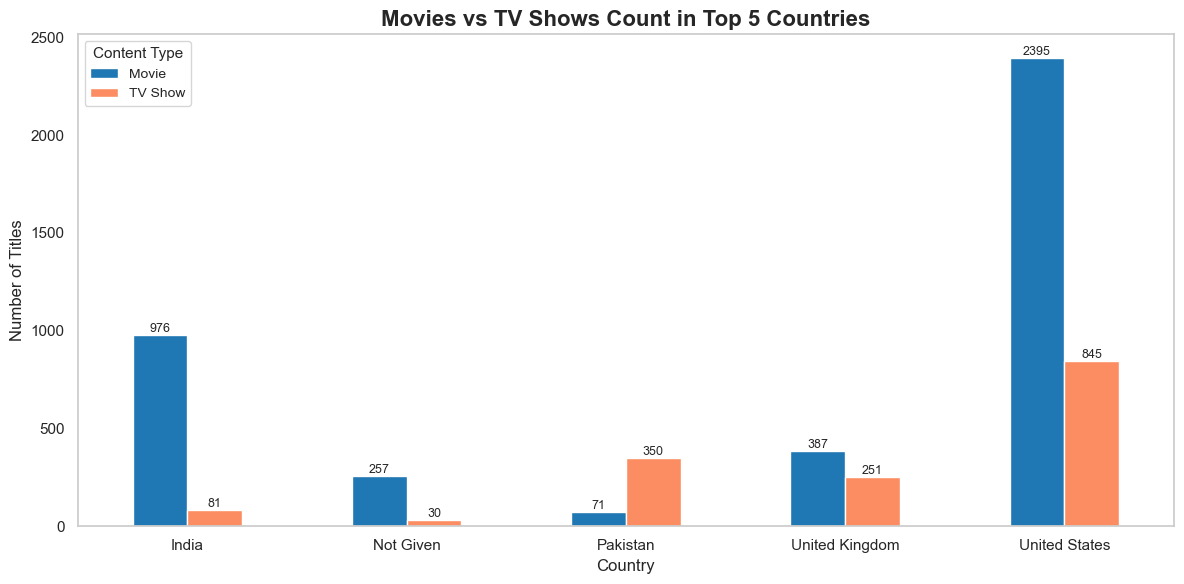

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot setup
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Grouped bar chart
ax = country_type_counts.plot(kind='bar', 
                              figsize=(12,6), 
                              stacked=False, 
                              color=['#1f77b4', '#fc8d62'])  # Custom colors

ax.grid(False)
# Title and labels
plt.title("Movies vs TV Shows Count in Top 5 Countries", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=0)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

# Legend and layout
plt.legend(title="Content Type", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

## 5.9 Top 10 Movie Genres
- Horizontal Bar Plot.

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64


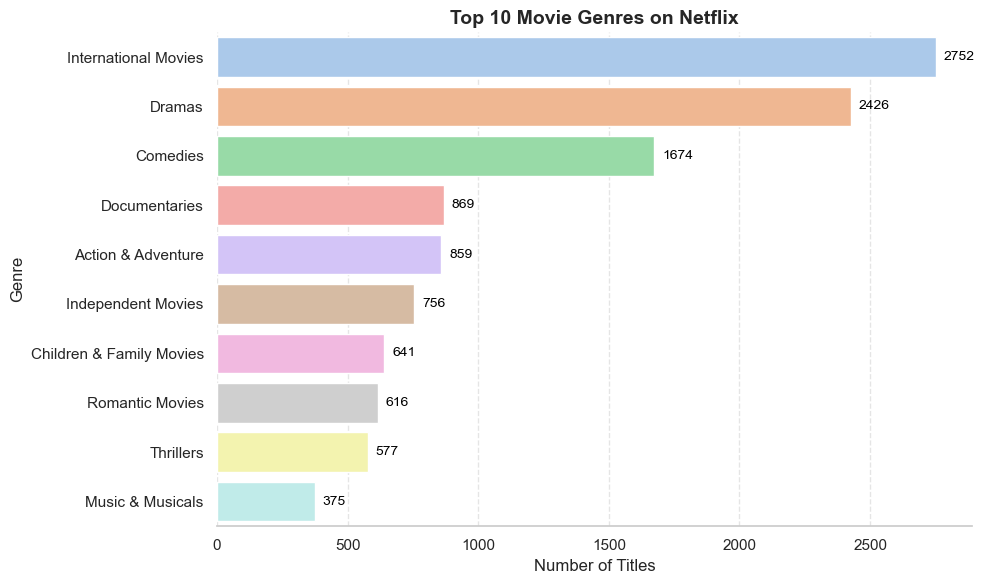

In [53]:
# Top 10 Movie Genres

# Filter Movies
movies_df = df[df['type'] == 'Movie']

# Since 'listed_in' can have multiple genres separated by commas, let's split and count them
movie_genres = movies_df['listed_in'].str.split(',').explode().str.strip()
top_10_movie_genres = movie_genres.value_counts().head(10)

# Display
print(top_10_movie_genres)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_movie_genres.values,
                 y=top_10_movie_genres.index,
                 palette='pastel')

# Add value labels to the end of each bar
for i, v in enumerate(top_10_movie_genres.values):
    ax.text(v + 30, i, str(v), color='black', va='center', fontsize=10)

# Titles and labels
plt.title('Top 10 Movie Genres on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True)

plt.tight_layout()
plt.show()

## 5.10 Top 10 TV Show Genres
- Horizontal Bar Plot.

listed_in
International TV Shows    1349
TV Dramas                  762
TV Comedies                573
Crime TV Shows             469
Kids' TV                   448
Docuseries                 394
Romantic TV Shows          370
Reality TV                 255
British TV Shows           252
Anime Series               174
Name: count, dtype: int64


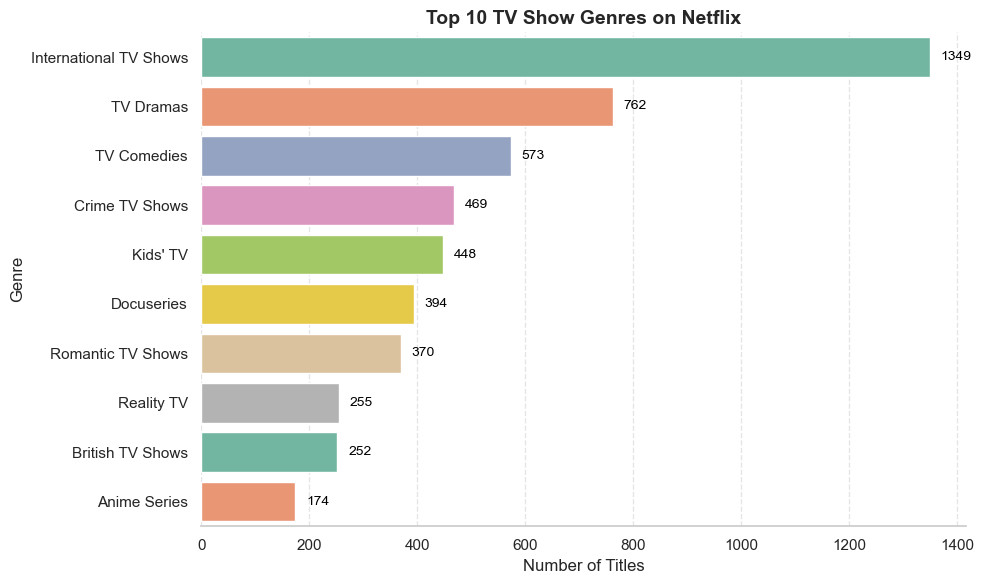

In [54]:
# Top 10 TV Show Genres

# Filter TV Shows
tv_shows_df = df[df['type'] == 'TV Show']

# Split and count genres
tv_genres = tv_shows_df['listed_in'].str.split(',').explode().str.strip()
top_10_tv_genres = tv_genres.value_counts().head(10)

# Display
print(top_10_tv_genres)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_tv_genres.values,
                 y=top_10_tv_genres.index,
                 palette='Set2')

# Add value labels next to each bar
for i, v in enumerate(top_10_tv_genres.values):
    ax.text(v + 20, i, str(v), color='black', va='center', fontsize=10)

# Titles and labels
plt.title('Top 10 TV Show Genres on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True)

plt.tight_layout()
plt.show()

## 5.11 Distribution of Content Ratings
- Horizontal Bar Plot.

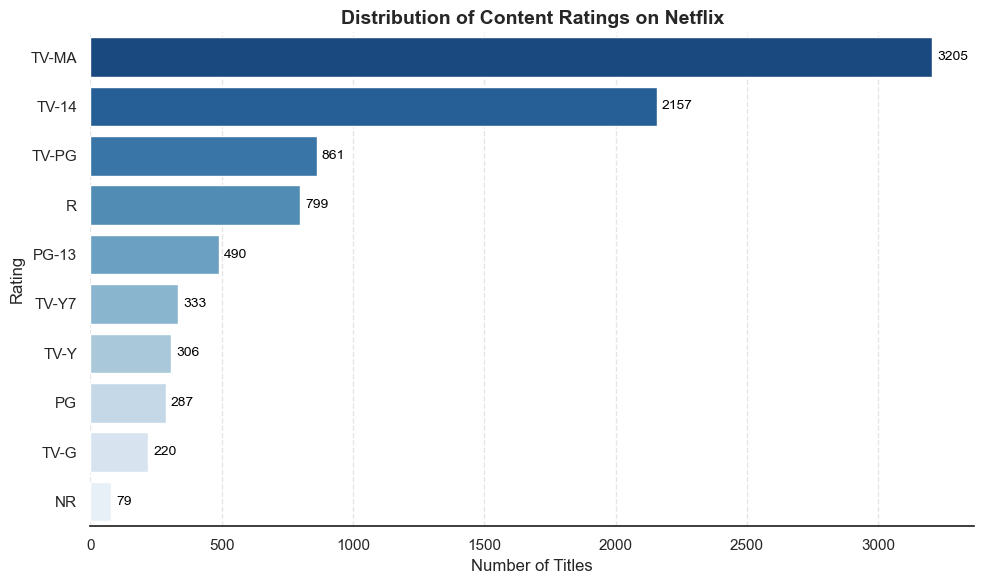

In [59]:
# Distribution of Ratings

# Count ratings
rating_counts = df['rating'].value_counts().head(10)  # Top 10 most common ratings

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=rating_counts.values,
                 y=rating_counts.index,
                 palette='Blues_r')

# Add value labels next to bars
for i, v in enumerate(rating_counts.values):
    ax.text(v + 20, i, str(v), color='black', va='center', fontsize=10)

# Titles and labels
plt.title('Distribution of Content Ratings on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True)

plt.tight_layout()
plt.show()

# ✅ 6. Key Insights

- Netflix content is heavily dominated by Movies (~70%).
- Major surge in content addition observed between 2016–2020.
- Content library is fresh, with most titles released post-2015.
- United States, India, and the United Kingdom are top content contributors.
- Dominant genres include Drama, Comedy, Crime, and International content.
- Netflix catalog is primarily targeted towards mature and teenage audiences.

# 📌 7. Conclusion

Netflix's content library has grown rapidly, especially in the past 6 years,
and is tailored to a global, mature audience with a strong preference for drama and international films.
This EDA highlights the strategic decisions behind content expansion.
